Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("c:/Users/praveen/Downloads/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


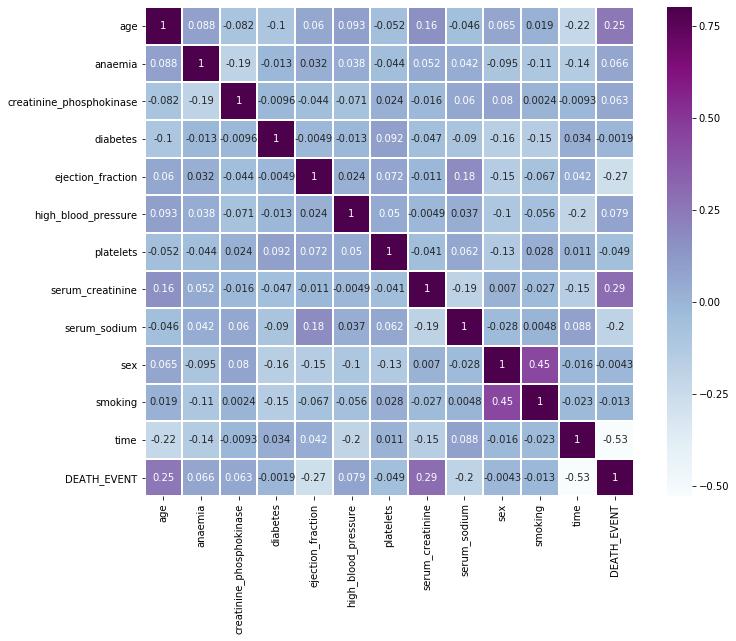

In [5]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(matrix, vmax=.8,annot=True, square=True,linewidths=1, cmap="BuPu")

In [6]:
matrix = df.corr() 
matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


   index  DEATH_EVENT
0      0          203
1      1           96
index            0
DEATH_EVENT    203
Name: 0, dtype: int64
index           1
DEATH_EVENT    96
Name: 1, dtype: int64


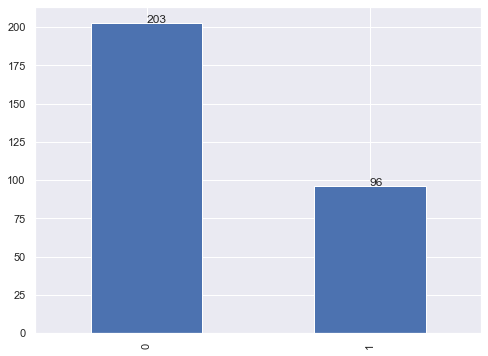

In [7]:
sns.set(rc={'figure.figsize':(8,6)})
groupedvalues=df['DEATH_EVENT'].value_counts().reset_index()
print(groupedvalues)
g=df['DEATH_EVENT'].value_counts().plot.bar()
for index, row in groupedvalues.iterrows():
    g.text(row['index'],row.DEATH_EVENT, round(row.DEATH_EVENT,2))
    print(row)

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
df.anaemia.unique()

array([0, 1], dtype=int64)

DEATH_EVENT    0   1
anaemia             
0            120  50
1             83  46


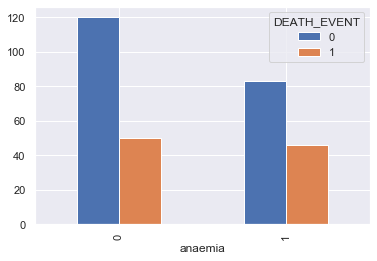

In [10]:
anaemia=pd.crosstab(df['anaemia'],df['DEATH_EVENT'])
print(anaemia)
anaemia.plot(kind="bar", stacked=False, figsize=(6,4))

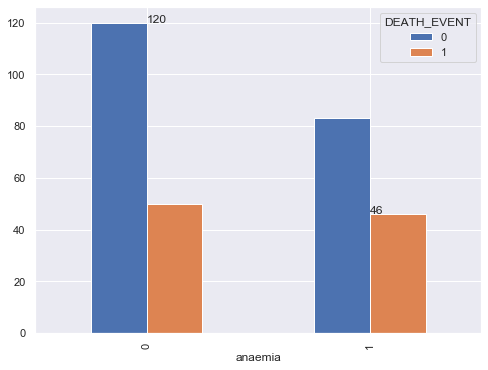

In [11]:
sns.set(rc={'figure.figsize':(8,6)})
values=pd.crosstab(df['anaemia'],df['DEATH_EVENT'])
groupedvalues=values.reset_index()
g=values.plot.bar()
for index, row in groupedvalues.iterrows():
    g.text(row.anaemia,row[index], round(row[index]))
    
    

In [12]:
df['high_blood_pressure'].unique()

array([1, 0], dtype=int64)

DEATH_EVENT            0   1
high_blood_pressure         
0                    137  57
1                     66  39


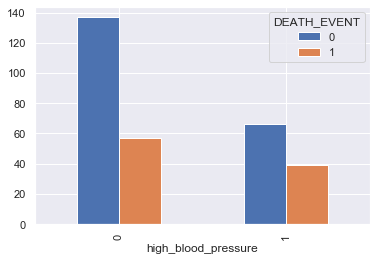

In [13]:
high_blood_pressure=pd.crosstab(df['high_blood_pressure'],df['DEATH_EVENT'])
print(high_blood_pressure)
high_blood_pressure.plot(kind="bar", stacked=False, figsize=(6,4))

C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.09692395 0.01324461 0.08212138 0.03162014 0.1389851  0.02366223
 0.06711165 0.12292564 0.09183877 0.02347114 0.02174033 0.28635506]


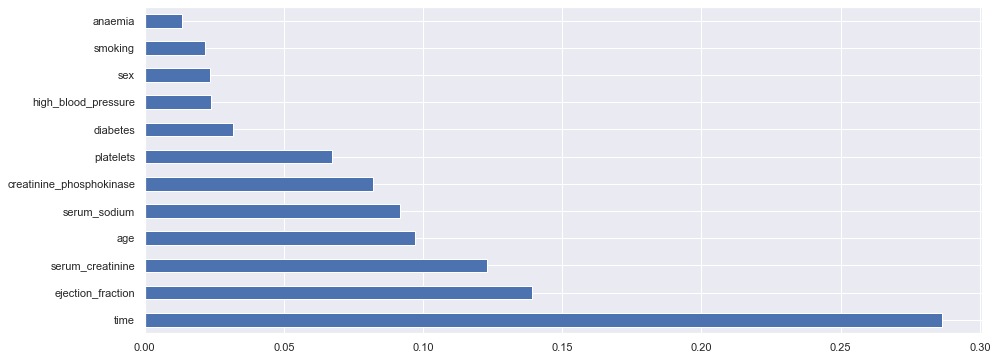

In [14]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [15]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
fs=featureScores.nlargest(7,'Score')
fs

,Specs,Score
6,platelets,26135.771990
11,time,3826.892661
2,creatinine_phosphokinase,1897.314839
4,ejection_fraction,79.072541
0,age,44.619455
7,serum_creatinine,19.814118
8,serum_sodium,1.618175


In [18]:
fs['Specs']

6                    platelets
11                        time
2     creatinine_phosphokinase
4            ejection_fraction
0                          age
7             serum_creatinine
8                 serum_sodium
Name: Specs, dtype: object

In [19]:
feature_cols=[]
for i in fs['Specs']:
    feature_cols.append(i)
feature_cols

['platelets',
 'time',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'age',
 'serum_creatinine',
 'serum_sodium']

In [20]:
XX=df[feature_cols]

In [21]:
XX.head()

,platelets,time,creatinine_phosphokinase,ejection_fraction,age,serum_creatinine,serum_sodium
0,265000.00,4,582,20,75.0,1.9,130
1,263358.03,6,7861,38,55.0,1.1,136
2,162000.00,7,146,20,65.0,1.3,129
3,210000.00,7,111,20,50.0,1.9,137
4,327000.00,8,160,20,65.0,2.7,116


In [22]:
y=df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(XX,y, test_size =0.3)

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
sc_x_train = sc.fit_transform(x_train)  
sc_x_cv = sc.transform(x_cv) 

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression() 
model_lr.fit(x_train, y_train)
result = model_lr.score(x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))
#LogisticRegression(C=1.0,class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

Accuracy: 87.778%


C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
model_lr.fit(sc_x_train, y_train)
result = model_lr.score(sc_x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 83.333%


C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
pr0=model_lr.predict(sc_x_cv)
accuracy_score(y_cv,pr0)

0.8333333333333334

In [29]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(random_state=1) 
model_rf.fit(x_train, y_train)
result = model_rf.score(x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 81.111%


C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
prf=model_rf.predict(x_cv)
accuracy_score(y_cv,prf)

0.8111111111111111

In [31]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(XX,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = XX.loc[train_index],XX.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    if score>0.85:
        best_model=model
    print('accuracy_score',score)     
    i+=1 

C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



1 of kfold 5
accuracy_score

C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.8852459016393442

2 of kfold 5
accuracy_score

C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.7666666666666667

3 of kfold 5
accuracy_score 0.8

4 of kfold 5
accuracy_score 0.7966101694915254

5 of kfold 5
accuracy_score 0.7288135593220338


C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [33]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
pr=best_model.predict(x_cv)

In [35]:
accuracy_score(y_cv,pr)

0.9777777777777777

In [41]:
print(confusion_matrix(y_cv,pr))
print(classification_report(y_cv,pr))

[[63  0]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.93      0.96        27

    accuracy                           0.98        90
   macro avg       0.98      0.96      0.97        90
weighted avg       0.98      0.98      0.98        90



In [36]:
pr1=model.predict(x_cv)
accuracy_score(y_cv,pr1)

0.9555555555555556

In [42]:
print(confusion_matrix(y_cv,pr1))
print(classification_report(y_cv,pr1))

[[62  1]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.96      0.89      0.92        27

    accuracy                           0.96        90
   macro avg       0.96      0.94      0.95        90
weighted avg       0.96      0.96      0.96        90



In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier() 
model_et.fit(x_train, y_train)
result = model_et.score(x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 83.333%


C:\Users\praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
result = classifier.score(x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 83.333%


In [39]:
classifier.fit(sc_x_train, y_train)  
result = classifier.score(sc_x_cv, y_cv)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 75.556%
